

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W6/W6P45.ipynb)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [ ]:
import statsmodels
from statsmodels.tsa import stattools

In [ ]:
def download_data():  ### This dude will download the dataset from the directory directly!
  import requests
  url = "https://raw.githubusercontent.com/y-akbal/Tedu_Time_Series/main/W6/pm10.csv"
  res = requests.get(url, allow_redirects=True)
  with open('pm10.csv','wb') as file:
    file.write(res.content)

download_data()  


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
['W6P3.ipynb', 'W6P1.ipynb', 'W6P2.ipynb', 'W6P4.ipynb', 'pm10.xlsx']


Click [here](https://ww2.arb.ca.gov/resources/inhalable-particulate-matter-and-health) to see what sort of data set you will be working with.

Using pandas import the data set, and pick up the related column!

In [ ]:
data = pd.read_csv("pm10.csv")

In [ ]:
data

,Unnamed: 0,date,PM10 ( µg/m³ )
0,0,2015-01-14,49.414909
1,1,2015-01-15,77.668182
2,2,2015-01-16,83.873455
3,3,2015-01-17,77.114727
4,4,2015-01-18,53.678000
...,...,...,...
2198,2198,2021-01-20,103.184000
2199,2199,2021-01-21,94.886000
2200,2200,2021-01-22,143.202000
2201,2201,2021-01-23,115.558000


This data set (third column) is used in a real research is PM10 density pollution of Ankara measured from certain places.  

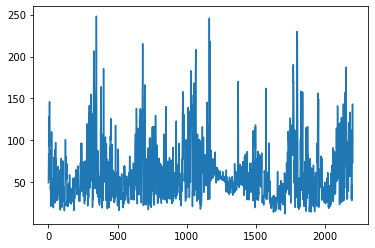

In [ ]:
plt.plot(data)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

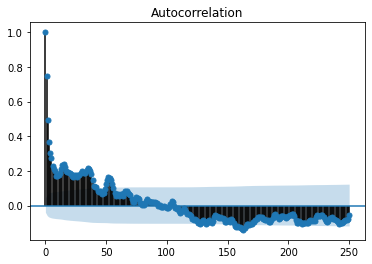

In [ ]:
plot_acf(data, lags = 250);

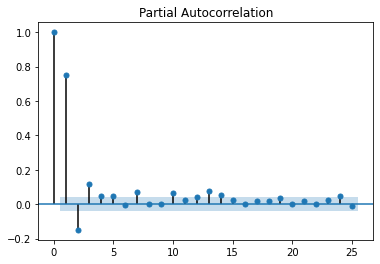

In [ ]:
plot_pacf(data, lags = 25);

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(data)   #it does not have a unit root!

(-7.4843946585375685,
 4.680471850431244e-11,
 13,
 2189,
 {'1%': -3.4333408565184294,
  '5%': -2.8628612620249507,
  '10%': -2.5674733728800154},
 19473.056701100544)

In [ ]:
from statsmodels.tsa.arima.model import  ARIMA

In [ ]:
model = ARIMA(data, order = (5,0,5))
res = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         PM10 ( µg/m³ )   No. Observations:                 2203
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -9846.102
Date:                Mon, 03 Oct 2022   AIC                          19716.204
Time:                        10:22:59   BIC                          19784.575
Sample:                             0   HQIC                         19741.186
                               - 2203                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.5561      5.046     11.802      0.000      49.666      69.447
ar.L1          0.6929      1.199      0.578      0.563      -1.657       3.043
ar.L2          0.2365      0.357      0.662      0.508      -0.463       0.937
ar.L3          0.5787      0.428      1.352      0.176      -0.260       1.417
ar.L4         -0.6535      0.882     -0.741      0.459      -2.383       1.076
ar.L5          0.1298      0.486      0.267      0.789      -0.822       1.082
ma.L1          0.1636      1.201      0.136      0.892      -2.190       2.517
ma.L2         -0.3422      0.679     -0.504      0.614      -1.673       0.989
ma.L3         -0.8443      0.142     -5.957      0.000      -1.122      -0.567
ma.L4          0.0251      1.083      0.023      0.982      -2.097       2.147
ma.L5          0.1352      0.371      0.364      0.716      -0.592       0.863
sigma2       446.2204      8.264     53.996      0.000     430.023     462.418
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2038.94
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.49
Prob(H) (two-sided):                  0.75   Kurtosis:                         7.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

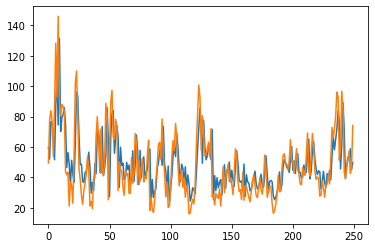

In [ ]:
plt.plot(res.predict()[:250])
plt.plot(data[:250])